In [255]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
def regression(X,Y,k):
    
    real_X = np.vstack(X for x in range(k))
    len_X = len(X)
    # Construct matrix
    for i in range(len_X):
        for kk in range(k):
            real_X[kk, i-1] = (X[i-1]**(kk))
    
    XTX = real_X.dot(real_X.T)
#     [ll,oo] = np.linalg.eig(XTX)
    XTY = real_X.dot(Y)
#     w = np.linalg.inv(XTX).dot(XTY)
    w = np.mat(real_X).I.T.dot(np.mat(Y).T)
    return w
    print(XTX)
    print(XTY)
    print(w)


In [257]:
def evaluate_reg(w,X):
    k = len(w)
    real_X = np.vstack(X for x in range(k))
    len_X = len(X)
    for i in range(len_X):
        for kk in range(k):
            real_X[kk, i-1] = (X[i-1]**(kk))
    #Y estimates
    Y_e = (real_X.T).dot(w)
    return Y_e

In [258]:
 def MSE(Y_e,Y):
        MSEvector = [(Y_e[i]-Y[i])**2 for i in range(len(Y))]
        MSE = sum(MSEvector)/len(Y)
        return MSE

[[2.5]]
[[1.5]
 [0.4]]
[[ 9. ]
 [-7.1]
 [ 1.5]]
[[-5.        ]
 [15.16666667]
 [-8.5       ]
 [ 1.33333333]]


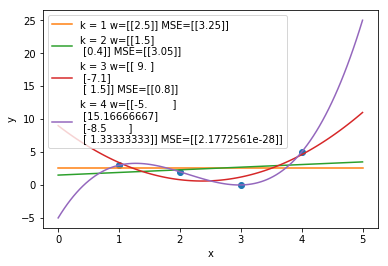

In [259]:
a = [1 ,2, 3, 4]
b = [3, 2, 0, 5]

plt.plot(a,b,'o')
dim = [1,2,3,4]
for k in dim:
    x_axix = np.linspace(0,5,100)
    y = np.linspace(0,0,100)
    w = regression(a,b,k)
    Y_e = evaluate_reg(w,a)
    MSEv = MSE(Y_e,b)
    
    for p in range(len(x_axix)):
        for kk in range(k):
               y[p] = y[p] + (x_axix[p] ** kk) * w[kk]
    print(w)
    plt.plot(x_axix,y,label = "k = "+str(k)+" w="+str(w)+" MSE="+str(MSEv))
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()


In [260]:
def generatedata(sample_number=30):
    sampleNo = sample_number
    mu = 0
    sigma = 0.07
    s = np.random.normal(mu, sigma, sampleNo)

    extent = np.linspace(0,1,1000)
    samplex = random.sample(list(extent),sampleNo)  # b2 is out sample point in x

    sample_label = [(math.sin(2*math.pi*i))**2 for i in samplex]  # this is the y value of out sample point
    sample_label = sample_label+s   # add some errors

    return samplex,sample_label

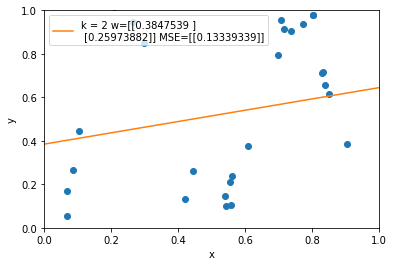

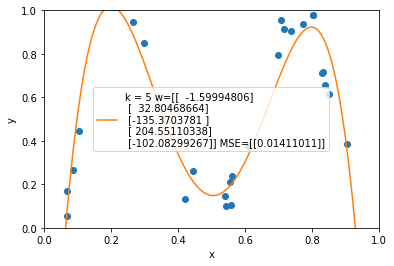

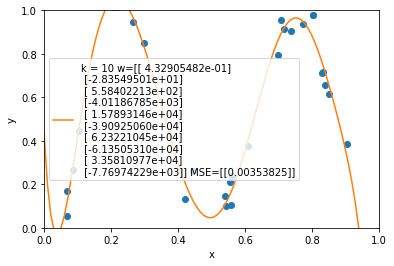

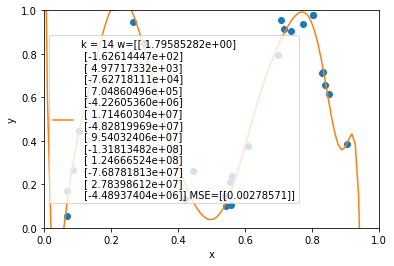

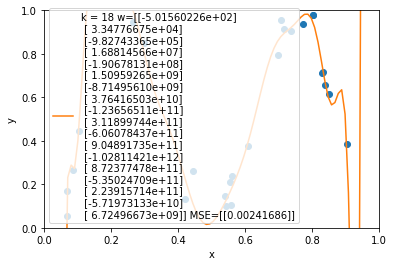

In [261]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
[rx,ry] = generatedata(sample_number=30)
dim = [2,5,10,14,18]
for k in dim:
    x_axix = np.linspace(0,1,100)
    y = np.linspace(0,0,100)
    w = regression(rx,ry,k)
    Y_e = evaluate_reg(w,rx)
    MSEv = MSE(Y_e,ry)
    for p in range(len(x_axix)):
        for kk in range(k):
               y[p] = y[p] + (x_axix[p] ** kk) * w[kk]
    plt.figure()
    plt.plot(rx,ry,'o')
    plt.plot(x_axix,y,label = "k = "+str(k)+" w="+str(w)+" MSE="+str(MSEv))
    plt.legend()
    plt.ylabel('y')
    plt.xlabel('x')
    plt.xlim([0,1])
    plt.ylim([0,1])
    

plt.show()


# 2.b

[0.13829024503859053,
 0.13339338900239078,
 0.13332904566269518,
 0.13315821573841233,
 0.014110113011128984,
 0.010216951850577935,
 0.003995149290999345,
 0.0039045306597578393,
 0.0036810784602252455,
 0.0035382460966576082,
 0.003250992719500519,
 0.003122216296852424,
 0.002858201248657463,
 0.0027857057074451162,
 0.002783507580949841,
 0.0027614488499469853,
 0.0027453846680035783,
 0.0024168584480222664]

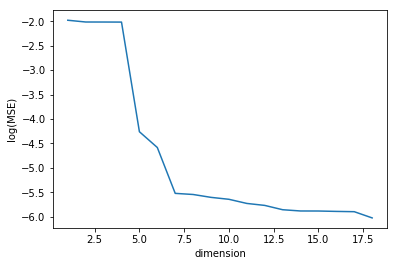

In [263]:
dim = range(1,19)
MSEv = list(range(18))
for k in dim:
    x_axix = np.linspace(0,1,100)
    y = np.linspace(0,0,100)
    w = regression(rx,ry,k)
    Y_e = evaluate_reg(w,rx)
    MSEv[k-1] = MSE(Y_e,ry)[0,0]
plt.plot(dim,np.log(MSEv))
plt.xlabel("dimension")
plt.ylabel("log(MSE)")

MSEv

# 2.c

Text(0, 0.5, 'log(test_MSE)')

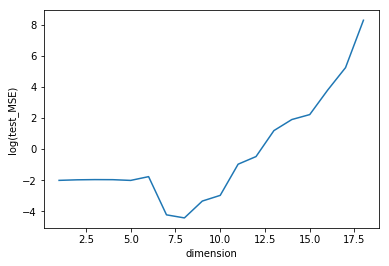

In [265]:
[rxt,ryt] = generatedata(sample_number=1000)
MSEv = list(range(18))
dim = range(1,19)
for k in dim:
    w = regression(rx,ry,k)
    Y_e = evaluate_reg(w,rxt)
    MSEv[k-1] = MSE(Y_e,ryt)[0,0]
plt.plot(dim,np.log(MSEv))
plt.xlabel("dimension")
plt.ylabel("log(test_MSE)")



# 2.d

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
[-2.041707905593022, -2.0391440238293845, -2.098406716546962, -2.0989221231144675, -3.1010052201848186, -3.0968565390084, -4.916586626023252, -4.920466271696438, -5.31650815990816, -5.311821340465402, -5.332149865331264, -5.335873044005216, -5.325688537686616, -5.335023969497556, -5.334109699736668, -5.33536816536691, -5.343384401074248, -5.338588305679023, -5.338831940418283]
range(0, 19)


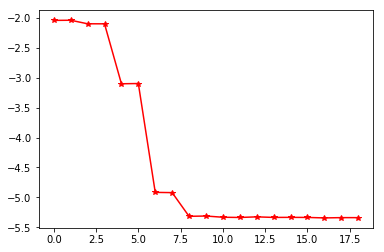

In [266]:
mseinx = []
for k in range(19):
    MSE1 = 0
    print(k)
    for pp in range(100):
        [rx,ry] = generatedata(sample_number=1000)
        w = regression(rx,ry,k+1)
        Y_e = evaluate_reg(w,rx)
        MSE1 = MSE1+MSE(Y_e,ry)
    MSE1 = MSE1/100
    mseinx.append(MSE1)
logmseinx = [math.log(i) for i in mseinx]
xaxix = range(19)
print(logmseinx)
print(xaxix)
plt.plot(xaxix, logmseinx, 'r*-')
plt.show()

In [267]:
mseinx = []
        for ii in range(19):
            print(ii)
            MSE1 = 0
            for pp in range(100):
                [b2, yforb2, realyforb2] = Generatedata().f()
                MSE1 = MSE1+self.MSE(ii + 1, b2)
            MSE1 = MSE1/100
            mseinx.append(MSE1)

        logmseinx = [math.log(i) for i in mseinx]
        xaxix = range(19)
        print(logmseinx)
        print(xaxix)
        plt.plot(xaxix, logmseinx, 'r*-')

IndentationError: unexpected indent (<ipython-input-267-b70d73190f8a>, line 2)